In [1]:
from datasets import load_dataset

raw_datasets = load_dataset('code_search_net', 'python')

ConnectionError: Couldn't reach 'code_search_net' on the Hub (ConnectionError)

In [ ]:
# Don't uncomment the following line unless your dataset is small!
# training_corpus = [raw_datasets["train"][i: i + 1000]["whole_func_string"] for i in range(0, len(raw_datasets["train"]), 1000)]

def get_training_corpus():
    training_corpus = (raw_datasets['train'][i:i+1000]['whole_func_string'] for i in range(0, len(raw_datasets['train']), 1000))
    return training_corpus


def get_training_corpus():
    dataset = raw_datasets['train']
    for start_idx in range(0, len(dataset), 1000):
        samples = dataset[start_idx:start_idx+1000]
        yield samples['whole_func_string']

training_corpus = get_training_corpus()

from transformers import AutoTokenizer

old_tokenizer = AutoTokenizer.from_pretrained('gpt2')
example = '''def add_numbers(a, b):
    """Add the two numbers `a` and `b`."""
    return a + b'''

tokens = old_tokenizer.tokenize(example)
tokens

tokenizer = old_tokenizer.train_new_from_iterator(training_corpus, 52000)
tokens = tokenizer(example)
tokenizer.save_pretrained('code-search-net-tokenizer')

from huggingface_hub import notebook_login

notebook_login()
tokenizer.push_to_hub("code-search-net-tokenizer")
# Replace "huggingface-course" below with your actual namespace to use your own tokenizer
tokenizer = AutoTokenizer.from_pretrained("huggingface-course/code-search-net-tokenizer")

In [2]:
checkpoint = r'D:\huggingface\google-bert\bert-base-cased'
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
example = "My name is Sylvain and I work at Hugging Face in Brooklyn."
encoding = tokenizer(example)
print(type(encoding))

<class 'transformers.tokenization_utils_base.BatchEncoding'>


In [3]:
tokenizer.is_fast

True

In [4]:
encoding.is_fast

True

In [5]:
encoding

{'input_ids': [101, 1422, 1271, 1110, 156, 7777, 2497, 1394, 1105, 146, 1250, 1120, 20164, 10932, 10289, 1107, 6010, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [7]:
encoding.tokens()

['[CLS]',
 'My',
 'name',
 'is',
 'S',
 '##yl',
 '##va',
 '##in',
 'and',
 'I',
 'work',
 'at',
 'Hu',
 '##gging',
 'Face',
 'in',
 'Brooklyn',
 '.',
 '[SEP]']

In [8]:
encoding.word_ids()

[None, 0, 1, 2, 3, 3, 3, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, None]

In [9]:
start, end = encoding.word_to_chars(3)
example[start:end]

'Sylvain'

In [11]:
from transformers import pipeline

checkpoint = r'D:\huggingface\dbmdz\bert-large-cased-finetuned-conll03-english'
token_classifier = pipeline("token-classification", model=checkpoint)
token_classifier("My name is Sylvain and I work at Hugging Face in Brooklyn.")

Some weights of the model checkpoint at D:\huggingface\dbmdz\bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity': 'I-PER',
  'score': 0.99938285,
  'index': 4,
  'word': 'S',
  'start': 11,
  'end': 12},
 {'entity': 'I-PER',
  'score': 0.99815494,
  'index': 5,
  'word': '##yl',
  'start': 12,
  'end': 14},
 {'entity': 'I-PER',
  'score': 0.9959072,
  'index': 6,
  'word': '##va',
  'start': 14,
  'end': 16},
 {'entity': 'I-PER',
  'score': 0.99923277,
  'index': 7,
  'word': '##in',
  'start': 16,
  'end': 18},
 {'entity': 'I-ORG',
  'score': 0.9738931,
  'index': 12,
  'word': 'Hu',
  'start': 33,
  'end': 35},
 {'entity': 'I-ORG',
  'score': 0.976115,
  'index': 13,
  'word': '##gging',
  'start': 35,
  'end': 40},
 {'entity': 'I-ORG',
  'score': 0.9887976,
  'index': 14,
  'word': 'Face',
  'start': 41,
  'end': 45},
 {'entity': 'I-LOC',
  'score': 0.9932106,
  'index': 16,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

In [12]:
from transformers import pipeline

token_classifier = pipeline("token-classification", aggregation_strategy="simple", model=checkpoint)
token_classifier("My name is Sylvain and I work at Hugging Face in Brooklyn.")

Some weights of the model checkpoint at D:\huggingface\dbmdz\bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity_group': 'PER',
  'score': 0.9981694,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9796019,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9932106,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

In [13]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForTokenClassification.from_pretrained(checkpoint)

example = "My name is Sylvain and I work at Hugging Face in Brooklyn."
inputs = tokenizer(example, return_tensors="pt")
outputs = model(**inputs)

Some weights of the model checkpoint at D:\huggingface\dbmdz\bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [14]:
print(inputs['input_ids'].shape)
print(outputs.logits.shape)

torch.Size([1, 19])
torch.Size([1, 19, 9])


In [15]:
import torch
probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)[0].tolist()
len(probabilities), len(probabilities[0])

(19, 9)

In [16]:
predictions = outputs.logits.argmax(dim=-1)[0].tolist()
predictions

[0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 6, 6, 6, 0, 8, 0, 0]

In [17]:
model.config.id2label

{0: 'O',
 1: 'B-MISC',
 2: 'I-MISC',
 3: 'B-PER',
 4: 'I-PER',
 5: 'B-ORG',
 6: 'I-ORG',
 7: 'B-LOC',
 8: 'I-LOC'}

In [21]:
results = []
tokens = inputs.tokens()
tokens

['[CLS]',
 'My',
 'name',
 'is',
 'S',
 '##yl',
 '##va',
 '##in',
 'and',
 'I',
 'work',
 'at',
 'Hu',
 '##gging',
 'Face',
 'in',
 'Brooklyn',
 '.',
 '[SEP]']

In [22]:
for idx, pred in enumerate(predictions):
    label = model.config.id2label[pred]
    if label != 'O':
        results.append({'entity':label, 'score':probabilities[idx][pred], 'word':tokens[idx], 'index':idx})

results

[{'entity': 'I-PER', 'score': 0.9993828535079956, 'word': 'S', 'index': 4},
 {'entity': 'I-PER', 'score': 0.9981549382209778, 'word': '##yl', 'index': 5},
 {'entity': 'I-PER', 'score': 0.995907187461853, 'word': '##va', 'index': 6},
 {'entity': 'I-PER', 'score': 0.9992326498031616, 'word': '##in', 'index': 7},
 {'entity': 'I-ORG', 'score': 0.9738932251930237, 'word': 'Hu', 'index': 12},
 {'entity': 'I-ORG',
  'score': 0.9761149883270264,
  'word': '##gging',
  'index': 13},
 {'entity': 'I-ORG', 'score': 0.9887976050376892, 'word': 'Face', 'index': 14},
 {'entity': 'I-LOC',
  'score': 0.9932106137275696,
  'word': 'Brooklyn',
  'index': 16}]

In [23]:
inputs_with_offsets = tokenizer(example, return_offsets_mapping=True)
inputs_with_offsets['offset_mapping']

[(0, 0),
 (0, 2),
 (3, 7),
 (8, 10),
 (11, 12),
 (12, 14),
 (14, 16),
 (16, 18),
 (19, 22),
 (23, 24),
 (25, 29),
 (30, 32),
 (33, 35),
 (35, 40),
 (41, 45),
 (46, 48),
 (49, 57),
 (57, 58),
 (0, 0)]

In [24]:
example[12:14]

'yl'

In [25]:
results = []
inputs_with_offsets = tokenizer(example, return_offsets_mapping=True)
tokens = inputs_with_offsets.tokens()
offsets = inputs_with_offsets['offset_mapping']

for idx, pred in enumerate(predictions):
    label = model.config.id2label[pred]
    if label != 'O':
        start, end = offsets[idx]
        results.append({
            'entity':label,
            'score':probabilities[idx][pred],
            'index':idx,
            'start':start,
            'end':end
        })

results

[{'entity': 'I-PER',
  'score': 0.9993828535079956,
  'index': 4,
  'start': 11,
  'end': 12},
 {'entity': 'I-PER',
  'score': 0.9981549382209778,
  'index': 5,
  'start': 12,
  'end': 14},
 {'entity': 'I-PER',
  'score': 0.995907187461853,
  'index': 6,
  'start': 14,
  'end': 16},
 {'entity': 'I-PER',
  'score': 0.9992326498031616,
  'index': 7,
  'start': 16,
  'end': 18},
 {'entity': 'I-ORG',
  'score': 0.9738932251930237,
  'index': 12,
  'start': 33,
  'end': 35},
 {'entity': 'I-ORG',
  'score': 0.9761149883270264,
  'index': 13,
  'start': 35,
  'end': 40},
 {'entity': 'I-ORG',
  'score': 0.9887976050376892,
  'index': 14,
  'start': 41,
  'end': 45},
 {'entity': 'I-LOC',
  'score': 0.9932106137275696,
  'index': 16,
  'start': 49,
  'end': 57}]

In [26]:
import numpy as np

results = []
inputs_with_offsets = tokenizer(example, return_offsets_mapping=True)
tokens = inputs_with_offsets.tokens()
offsets = inputs_with_offsets["offset_mapping"]

idx = 0
while idx < len(predictions):
    pred = predictions[idx]
    label = model.config.id2label[pred]
    if label != 'O':
        label = label[2:]
        start, _ = offsets[idx]

        all_scores = []
        while idx < len(predictions) and model.config.id2label[predictions[idx]] == f'I-{label}':
            all_scores.append(probabilities[idx][pred])
            _, end = offsets[idx]
            idx += 1

        score = np.mean(all_scores).item()
        word = example[start:end]
        results.append({
            'entity_group':label,
            'score':score,
            'word':word,
            'start':start,
            'end':end
        })

    idx += 1

results

[{'entity_group': 'PER',
  'score': 0.998169407248497,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9796019395192465,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9932106137275696,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

In [28]:
from transformers import pipeline


checkpoint = r'D:\huggingface\distilbert\distilbert-base-cased-distilled-squad'
question_answerer = pipeline("question-answering", model=checkpoint) # max_seq_len=384, stride=128
context = """
🤗 Transformers is backed by the three most popular deep learning libraries — Jax, PyTorch, and TensorFlow — with a seamless integration
between them. It's straightforward to train your models with one before loading them for inference with the other.
"""
question = "Which deep learning libraries back 🤗 Transformers?"
question_answerer(question=question, context=context)

{'score': 0.9802601933479309,
 'start': 78,
 'end': 106,
 'answer': 'Jax, PyTorch, and TensorFlow'}

In [29]:
long_context = """
🤗 Transformers: State of the Art NLP

🤗 Transformers provides thousands of pretrained models to perform tasks on texts such as classification, information extraction,
question answering, summarization, translation, text generation and more in over 100 languages.
Its aim is to make cutting-edge NLP easier to use for everyone.

🤗 Transformers provides APIs to quickly download and use those pretrained models on a given text, fine-tune them on your own datasets and
then share them with the community on our model hub. At the same time, each python module defining an architecture is fully standalone and
can be modified to enable quick research experiments.

Why should I use transformers?

1. Easy-to-use state-of-the-art models:
  - High performance on NLU and NLG tasks.
  - Low barrier to entry for educators and practitioners.
  - Few user-facing abstractions with just three classes to learn.
  - A unified API for using all our pretrained models.
  - Lower compute costs, smaller carbon footprint:

2. Researchers can share trained models instead of always retraining.
  - Practitioners can reduce compute time and production costs.
  - Dozens of architectures with over 10,000 pretrained models, some in more than 100 languages.

3. Choose the right framework for every part of a model's lifetime:
  - Train state-of-the-art models in 3 lines of code.
  - Move a single model between TF2.0/PyTorch frameworks at will.
  - Seamlessly pick the right framework for training, evaluation and production.

4. Easily customize a model or an example to your needs:
  - We provide examples for each architecture to reproduce the results published by its original authors.
  - Model internals are exposed as consistently as possible.
  - Model files can be used independently of the library for quick experiments.

🤗 Transformers is backed by the three most popular deep learning libraries — Jax, PyTorch and TensorFlow — with a seamless integration
between them. It's straightforward to train your models with one before loading them for inference with the other.
"""
question_answerer(question=question, context=long_context)

{'score': 0.9714872241020203,
 'start': 1892,
 'end': 1919,
 'answer': 'Jax, PyTorch and TensorFlow'}

In [30]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForQuestionAnswering.from_pretrained(checkpoint)

inputs = tokenizer(question, context, return_tensors='pt')
outputs = model(**inputs)


In [32]:
inputs['input_ids']

tensor([[  101,  5979,  1996,  3776,  9818,  1171,   100, 25267,   136,   102,
           100, 25267,  1110,  5534,  1118,  1103,  1210,  1211,  1927,  1996,
          3776,  9818,   783, 13612,   117,   153,  1183,  1942,  1766,  1732,
           117,  1105,  5157, 21484,  2271,  6737,   783,  1114,   170,  2343,
          1306,  2008,  9111,  1206,  1172,   119,  1135,   112,   188, 21546,
          1106,  2669,  1240,  3584,  1114,  1141,  1196, 10745,  1172,  1111,
          1107, 16792,  1114,  1103,  1168,   119,   102]])

In [34]:
len(inputs['input_ids'][0])

67

In [35]:
start_logits = outputs.start_logits
end_logits = outputs.end_logits

start_logits.shape, end_logits.shape

(torch.Size([1, 67]), torch.Size([1, 67]))

In [36]:
import torch
sequence_ids = inputs.sequence_ids()
sequence_ids

[None,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 None,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 None]

In [37]:
# Mask everything apart from the tokens of the context
mask = [i != 1 for i in sequence_ids]

# Unmask the [CLS] token, keep the [CLS] token, as some models use it to indicate that the answer is not in the context.
mask[0] = False
mask

[False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True]

In [38]:
mask = torch.tensor(mask)[None]
start_logits[mask] = -10000
end_logits[mask] = -10000

start_probabilities = torch.nn.functional.softmax(start_logits, dim=-1)[0]
end_probabilities = torch.nn.functional.softmax(end_logits, dim=-1)[0]
end_probabilities.shape

torch.Size([67])

In [40]:
scores = start_probabilities[:,None] * end_probabilities[None, :]
scores.shape

torch.Size([67, 67])

In [41]:
# mask the values where start_index > end_index
scores = torch.triu(scores)

max_index = scores.argmax().item()
start_index = max_index // scores.shape[1]
end_index = max_index % scores.shape[1]

print(scores[start_index, end_index])

tensor(0.9803, grad_fn=<SelectBackward0>)


In [42]:
max_index

1576

In [43]:
inputs_with_offsets = tokenizer(question, context, return_offsets_mapping=True)
offsets = inputs_with_offsets['offset_mapping']

start_char, _ = offsets[start_index]
_, end_char = offsets[end_index]
answer = context[start_char:end_char]

In [44]:
answer

'Jax, PyTorch, and TensorFlow'

In [45]:
result = {
    "answer": answer,
    "start": start_char,
    "end": end_char,
    "score": scores[start_index, end_index],
}
print(result)

{'answer': 'Jax, PyTorch, and TensorFlow', 'start': 78, 'end': 106, 'score': tensor(0.9803, grad_fn=<SelectBackward0>)}


In [46]:
inputs = tokenizer(question, long_context)
# we’ll get a number of tokens higher than the maximum length used in the question-answering pipeline (which is 384)
print(len(inputs["input_ids"]))

461


In [47]:
inputs = tokenizer(question, long_context, max_length=384, truncation="only_second")
print(tokenizer.decode(inputs["input_ids"]))

[CLS] Which deep learning libraries back [UNK] Transformers? [SEP] [UNK] Transformers : State of the Art NLP [UNK] Transformers provides thousands of pretrained models to perform tasks on texts such as classification, information extraction, question answering, summarization, translation, text generation and more in over 100 languages. Its aim is to make cutting - edge NLP easier to use for everyone. [UNK] Transformers provides APIs to quickly download and use those pretrained models on a given text, fine - tune them on your own datasets and then share them with the community on our model hub. At the same time, each python module defining an architecture is fully standalone and can be modified to enable quick research experiments. Why should I use transformers? 1. Easy - to - use state - of - the - art models : - High performance on NLU and NLG tasks. - Low barrier to entry for educators and practitioners. - Few user - facing abstractions with just three classes to learn. - A unified A

In [48]:
sentence = "This sentence is not too long but we are going to split it anyway."
inputs = tokenizer(
    sentence, truncation=True, return_overflowing_tokens=True, max_length=6, stride=2
)

for ids in inputs["input_ids"]:
    print(tokenizer.decode(ids))

[CLS] This sentence is not [SEP]
[CLS] is not too long [SEP]
[CLS] too long but we [SEP]
[CLS] but we are going [SEP]
[CLS] are going to split [SEP]
[CLS] to split it anyway [SEP]
[CLS] it anyway. [SEP]


In [49]:
inputs

{'input_ids': [[101, 1188, 5650, 1110, 1136, 102], [101, 1110, 1136, 1315, 1263, 102], [101, 1315, 1263, 1133, 1195, 102], [101, 1133, 1195, 1132, 1280, 102], [101, 1132, 1280, 1106, 3325, 102], [101, 1106, 3325, 1122, 4050, 102], [101, 1122, 4050, 119, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1]], 'overflow_to_sample_mapping': [0, 0, 0, 0, 0, 0, 0]}

In [50]:
inputs['overflow_to_sample_mapping'] # tells us which sentence each of the results corresponds to

[0, 0, 0, 0, 0, 0, 0]

In [51]:
sentences = [
    "This sentence is not too long but we are going to split it anyway.",
    "This sentence is shorter but will still get split.",
]
inputs = tokenizer(
    sentences, truncation=True, return_overflowing_tokens=True, max_length=6, stride=2
)

print(inputs["overflow_to_sample_mapping"])

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [ ]:
# see chapter5
'''
假设batch_size=1000, return_overflowing_tokens=True返回的数据会大于batch_size=1000, 造成不匹配会报错

# 方法1
def tokenize_and_split(examples):
    return tokenizer(examples['review'], truncation=True, max_length=128, return_overflowing_tokens=True)
# tokenized_dataset = drug_dataset.map(tokenize_and_split, batched=True) # error: ArrowInvalid: Column 8 named input_ids expected length 1000 but got length 1463
tokenized_dataset = drug_dataset.map(tokenize_and_split, batched=True, remove_columns=drug_dataset['train'].column_names)

# 方法2 
def tokenize_and_split(examples):
    result = tokenizer(examples['review'], truncation=True, max_length=128, return_overflowing_tokens=True)
    sample_map = result.pop('overflow_to_sample_mapping')
    for key, values in examples.items():
        result[key] = [values[i] for i in sample_map]
    return result

tokenized_dataset = drug_dataset.map(tokenize_and_split, batched=True) # 保留原字段，新增新字段(input_ids, attentin_mask,token_type_ids)

'''

In [52]:
inputs = tokenizer(question, long_context, stride=128, max_length=384, padding='longest',truncation='only_second',
                   return_overflowing_tokens=True, return_offsets_mapping=True)
inputs

{'input_ids': [[101, 5979, 1996, 3776, 9818, 1171, 100, 25267, 136, 102, 100, 25267, 131, 1426, 1104, 1103, 2051, 21239, 2101, 100, 25267, 2790, 4674, 1104, 3073, 4487, 9044, 3584, 1106, 3870, 8249, 1113, 6685, 1216, 1112, 5393, 117, 1869, 16026, 117, 2304, 10937, 117, 7584, 7317, 2734, 117, 5179, 117, 3087, 3964, 1105, 1167, 1107, 1166, 1620, 3483, 119, 2098, 6457, 1110, 1106, 1294, 5910, 118, 2652, 21239, 2101, 5477, 1106, 1329, 1111, 2490, 119, 100, 25267, 2790, 20480, 1116, 1106, 1976, 9133, 1105, 1329, 1343, 3073, 4487, 9044, 3584, 1113, 170, 1549, 3087, 117, 2503, 118, 9253, 1172, 1113, 1240, 1319, 2233, 27948, 1105, 1173, 2934, 1172, 1114, 1103, 1661, 1113, 1412, 2235, 10960, 119, 1335, 1103, 1269, 1159, 117, 1296, 185, 25669, 8613, 13196, 13682, 1126, 4220, 1110, 3106, 2484, 20717, 1673, 1105, 1169, 1129, 5847, 1106, 9396, 3613, 1844, 7857, 119, 2009, 1431, 146, 1329, 11303, 1468, 136, 122, 119, 12167, 118, 1106, 118, 1329, 1352, 118, 1104, 118, 1103, 118, 1893, 3584, 131, 118,

In [53]:
inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'offset_mapping', 'overflow_to_sample_mapping'])

In [54]:
inputs['offset_mapping']

[[(0, 0),
  (0, 5),
  (6, 10),
  (11, 19),
  (20, 29),
  (30, 34),
  (35, 36),
  (37, 49),
  (49, 50),
  (0, 0),
  (1, 2),
  (3, 15),
  (15, 16),
  (17, 22),
  (23, 25),
  (26, 29),
  (30, 33),
  (34, 36),
  (36, 37),
  (39, 40),
  (41, 53),
  (54, 62),
  (63, 72),
  (73, 75),
  (76, 79),
  (79, 82),
  (82, 86),
  (87, 93),
  (94, 96),
  (97, 104),
  (105, 110),
  (111, 113),
  (114, 119),
  (120, 124),
  (125, 127),
  (128, 142),
  (142, 143),
  (144, 155),
  (156, 166),
  (166, 167),
  (168, 176),
  (177, 186),
  (186, 187),
  (188, 191),
  (191, 194),
  (194, 201),
  (201, 202),
  (203, 214),
  (214, 215),
  (216, 220),
  (221, 231),
  (232, 235),
  (236, 240),
  (241, 243),
  (244, 248),
  (249, 252),
  (253, 262),
  (262, 263),
  (264, 267),
  (268, 271),
  (272, 274),
  (275, 277),
  (278, 282),
  (283, 290),
  (290, 291),
  (291, 295),
  (296, 298),
  (298, 299),
  (300, 306),
  (307, 309),
  (310, 313),
  (314, 317),
  (318, 326),
  (326, 327),
  (329, 330),
  (331, 343),
  (34

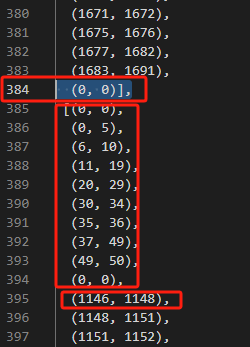

In [55]:
_ = inputs.pop('overflow_to_sample_mapping')
offsets = inputs.pop('offset_mapping')

inputs = inputs.convert_to_tensors('pt')
# Our long context was split in two, which means that after it goes through our model, we will have two sets of start and end logits
print(inputs['input_ids'].shape)

torch.Size([2, 384])


In [56]:
outputs = model(**inputs)

start_logits = outputs.start_logits
end_logits = outputs.end_logits
print(start_logits.shape, end_logits.shape)

torch.Size([2, 384]) torch.Size([2, 384])


In [59]:
sequence_ids = inputs.sequence_ids()

# Mask everything apart fromm the tokens of the context
mask = [i != 1 for i in sequence_ids]

# Unmask the [CLS] token, keep the [CLS] token, as some models use it to indicate that the answer is not in the context.
mask[0] = False
# Mask all the [PAD] tokens
mask = torch.logical_or(torch.tensor(mask)[None], (inputs['attention_mask'] == 0))

start_logits[mask] = -10000
end_logits[mask] = -10000

start_probabilities = torch.nn.functional.softmax(start_logits, dim=-1)
end_probabilities = torch.nn.functional.softmax(end_logits, dim=-1)

start_probabilities.shape

torch.Size([2, 384])

In [60]:
candidates = []
for start_probs, end_probs in zip(start_probabilities, end_probabilities):
    scores = start_probs[:, None] * end_probs[None, :]
    idx = torch.triu(scores).argmax().item()

    start_idx = idx // scores.shape[1]
    end_idx = idx % scores.shape[1]
    score = scores[start_idx, end_idx].item()
    candidates.append((start_idx, end_idx, score))

print(candidates)

[(0, 18, 0.33867061138153076), (173, 184, 0.9714872241020203)]


In [61]:
offsets

[[(0, 0),
  (0, 5),
  (6, 10),
  (11, 19),
  (20, 29),
  (30, 34),
  (35, 36),
  (37, 49),
  (49, 50),
  (0, 0),
  (1, 2),
  (3, 15),
  (15, 16),
  (17, 22),
  (23, 25),
  (26, 29),
  (30, 33),
  (34, 36),
  (36, 37),
  (39, 40),
  (41, 53),
  (54, 62),
  (63, 72),
  (73, 75),
  (76, 79),
  (79, 82),
  (82, 86),
  (87, 93),
  (94, 96),
  (97, 104),
  (105, 110),
  (111, 113),
  (114, 119),
  (120, 124),
  (125, 127),
  (128, 142),
  (142, 143),
  (144, 155),
  (156, 166),
  (166, 167),
  (168, 176),
  (177, 186),
  (186, 187),
  (188, 191),
  (191, 194),
  (194, 201),
  (201, 202),
  (203, 214),
  (214, 215),
  (216, 220),
  (221, 231),
  (232, 235),
  (236, 240),
  (241, 243),
  (244, 248),
  (249, 252),
  (253, 262),
  (262, 263),
  (264, 267),
  (268, 271),
  (272, 274),
  (275, 277),
  (278, 282),
  (283, 290),
  (290, 291),
  (291, 295),
  (296, 298),
  (298, 299),
  (300, 306),
  (307, 309),
  (310, 313),
  (314, 317),
  (318, 326),
  (326, 327),
  (329, 330),
  (331, 343),
  (34

In [62]:
len(offsets), len(offsets[0])

(2, 384)

In [64]:
for candidate, offset in zip(candidates, offsets):
    start_token, end_token, score = candidate
    start_char, _ = offset[start_token]
    _, end_char = offset[end_token]
    answer = long_context[start_char:end_char]
    result = {'answer':answer, 'start':start_char, 'end':end_char, 'score':score}
    print(result)


{'answer': '\n🤗 Transformers: State of the Art NLP', 'start': 0, 'end': 37, 'score': 0.33867061138153076}
{'answer': 'Jax, PyTorch and TensorFlow', 'start': 1892, 'end': 1919, 'score': 0.9714872241020203}


In [65]:
checkpoint = r'D:\huggingface\google-bert\bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
print(type(tokenizer.backend_tokenizer))

<class 'tokenizers.Tokenizer'>


In [67]:
print(tokenizer.backend_tokenizer.normalizer.normalize_str("Héllò hôw are ü?")) 

Héllò hôw are ü?


In [68]:
checkpoint = r'D:\huggingface\google-bert\bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
print(type(tokenizer.backend_tokenizer))
print(tokenizer.backend_tokenizer.normalizer.normalize_str("Héllò hôw are ü?")) 

<class 'tokenizers.Tokenizer'>
hello how are u?


In [69]:
tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str("Hello, how are  you?")

[('Hello', (0, 5)),
 (',', (5, 6)),
 ('how', (7, 10)),
 ('are', (11, 14)),
 ('you', (16, 19)),
 ('?', (19, 20))]

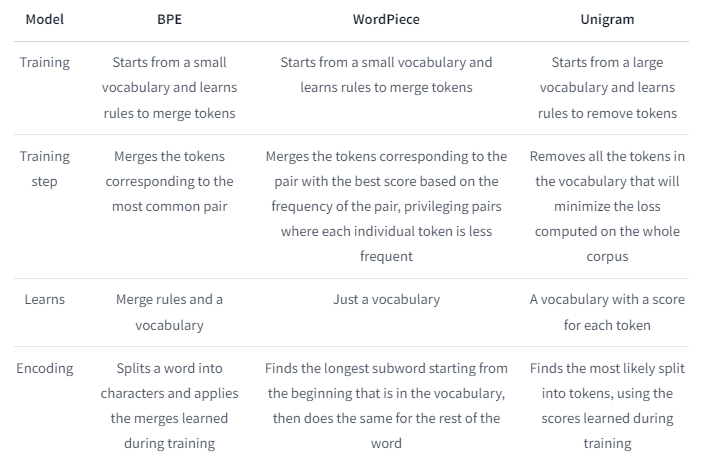

In [ ]:
from datasets import load_dataset

dataset = load_dataset("wikitext", name="wikitext-2-raw-v1", split="train")


def get_training_corpus():
    for i in range(0, len(dataset), 1000):
        yield dataset[i : i + 1000]["text"]


with open("wikitext-2.txt", "w", encoding="utf-8") as f:
    for i in range(len(dataset)):
        f.write(dataset[i]["text"] + "\n")


from tokenizers import (
    decoders,
    models,
    normalizers,
    pre_tokenizers,
    processors,
    trainers,
    Tokenizer,
)

tokenizer = Tokenizer(models.WordPiece(unk_token="[UNK]"))
tokenizer.normalizer = normalizers.BertNormalizer(lowercase=True)
tokenizer.normalizer = normalizers.Sequence(
    [normalizers.NFD(), normalizers.Lowercase(), normalizers.StripAccents()]
)
tokenizer.pre_tokenizer = pre_tokenizers.BertPreTokenizer()
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
pre_tokenizer = pre_tokenizers.Sequence(
    [pre_tokenizers.WhitespaceSplit(), pre_tokenizers.Punctuation()]
)
pre_tokenizer.pre_tokenize_str("Let's test my pre-tokenizer.")

special_tokens = ["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"]
trainer = trainers.WordPieceTrainer(vocab_size=25000, special_tokens=special_tokens)

tokenizer.train_from_iterator(get_training_corpus(), trainer=trainer)

tokenizer.model = models.WordPiece(unk_token="[UNK]")
tokenizer.train(["wikitext-2.txt"], trainer=trainer)


encoding = tokenizer.encode("Let's test this tokenizer.")
print(encoding.tokens)

cls_token_id = tokenizer.token_to_id("[CLS]")
sep_token_id = tokenizer.token_to_id("[SEP]")
print(cls_token_id, sep_token_id)


tokenizer.post_processor = processors.TemplateProcessing(
    single=f"[CLS]:0 $A:0 [SEP]:0",
    pair=f"[CLS]:0 $A:0 [SEP]:0 $B:1 [SEP]:1",
    special_tokens=[("[CLS]", cls_token_id), ("[SEP]", sep_token_id)],
)
encoding = tokenizer.encode("Let's test this tokenizer.")
print(encoding.tokens)

tokenizer.decoder = decoders.WordPiece(prefix="##")

tokenizer.decode(encoding.ids)


tokenizer.save("tokenizer.json")
new_tokenizer = Tokenizer.from_file("tokenizer.json")


from transformers import PreTrainedTokenizerFast

wrapped_tokenizer = PreTrainedTokenizerFast(
    tokenizer_object=tokenizer,
    # tokenizer_file="tokenizer.json", # You can load from the tokenizer file, alternatively
    unk_token="[UNK]",
    pad_token="[PAD]",
    cls_token="[CLS]",
    sep_token="[SEP]",
    mask_token="[MASK]",

)


from transformers import BertTokenizerFast

wrapped_tokenizer = BertTokenizerFast(tokenizer_object=tokenizer)